In [1]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap

In [2]:
Jan = nc.Dataset('VIIRS_SNPP_2018_monthly/AERDB_M3_VIIRS_SNPP.A2018001.001.2018344212718.nc','r')
Feb = nc.Dataset('VIIRS_SNPP_2018_monthly/AERDB_M3_VIIRS_SNPP.A2018032.001.2018344212718.nc','r')
Mar = nc.Dataset('VIIRS_SNPP_2018_monthly/AERDB_M3_VIIRS_SNPP.A2018060.001.2018344212719.nc','r')
Apr = nc.Dataset('VIIRS_SNPP_2018_monthly/AERDB_M3_VIIRS_SNPP.A2018091.001.2018344212721.nc','r')
May = nc.Dataset('VIIRS_SNPP_2018_monthly/AERDB_M3_VIIRS_SNPP.A2018121.001.2018344212721.nc','r')
Jun = nc.Dataset('VIIRS_SNPP_2018_monthly/AERDB_M3_VIIRS_SNPP.A2018152.001.2018344212721.nc','r')
Jul = nc.Dataset('VIIRS_SNPP_2018_monthly/AERDB_M3_VIIRS_SNPP.A2018182.001.2018344212759.nc','r')
Aug = nc.Dataset('VIIRS_SNPP_2018_monthly/AERDB_M3_VIIRS_SNPP.A2018213.001.2018344212721.nc','r')
Sep = nc.Dataset('VIIRS_SNPP_2018_monthly/AERDB_M3_VIIRS_SNPP.A2018244.001.2018344212721.nc','r')
Oct = nc.Dataset('VIIRS_SNPP_2018_monthly/AERDB_M3_VIIRS_SNPP.A2018274.001.2018344212721.nc','r')
Nov = nc.Dataset('VIIRS_SNPP_2018_monthly/AERDB_M3_VIIRS_SNPP.A2018305.001.2019030181836.nc','r')
Dec = nc.Dataset('VIIRS_SNPP_2018_monthly/AERDB_M3_VIIRS_SNPP.A2018335.001.2019030180820.nc','r')

In [3]:
List_2018 = [Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec]

### Testing one month of data

In [4]:
#file = Jan.variables['Aerosol_Type_Land_Ocean_Histogram'][:]
#data = file[1].data
data = Jul.variables['Aerosol_Optical_Thickness_550_Land_Ocean_Mean'][:]

In [5]:
lons = np.arange(-180, 181, 1)
lats = np.arange(-90, 91, 1)

lon, lat = np.meshgrid(lons, lats)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app


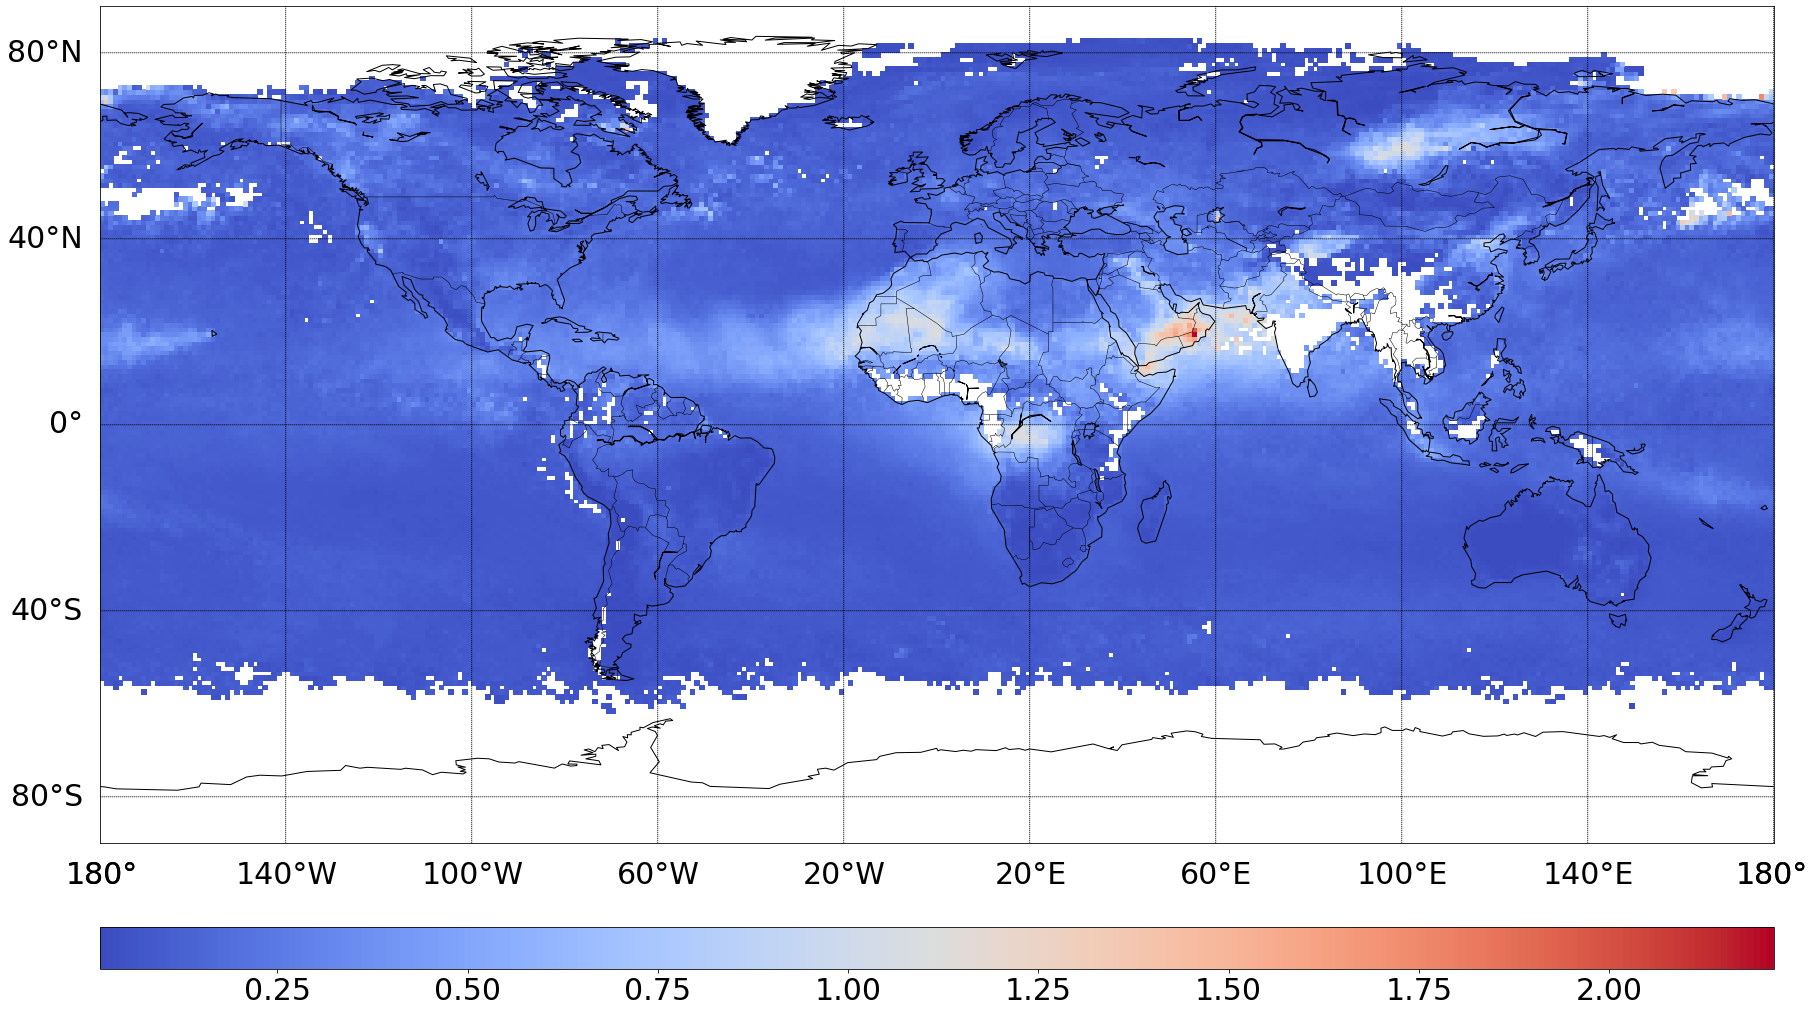

In [6]:
plt.figure(figsize = (30, 150))

m = Basemap()
xi, yi = m(lon, lat)
my_cmap = plt.get_cmap('coolwarm')

cs = m.pcolor(xi,yi,data, cmap = my_cmap)

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 40.), labels=[1,0,0,0], fontsize=30);
m.drawmeridians(np.arange(-180., 181., 40.), labels=[0,0,0,1], fontsize=30);

# Adding coast and country lines
m.drawcoastlines()
m.drawcountries()

cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.ax.tick_params(labelsize=30)
#cbar.set_label('count', fontsize=20)

plt.show()

### Zoom in on the UK

#### UK Latitudes, Longitudes

In [7]:
lon_0 = -11
lon_1 = 2
lat_0 = 50
lat_1 = 59

In [17]:
lons_uk = np.arange(lon_0, lon_1+1, 1)
lats_uk = np.arange(lat_0, lat_1+1, 1)

lon_uk, lat_uk = np.meshgrid(lons_uk, lats_uk)

In [19]:
x0 = 180 + lon_0
x1 = 180 + lon_1
y0 = 90 - lat_1
y1 = 90 - lat_0

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app


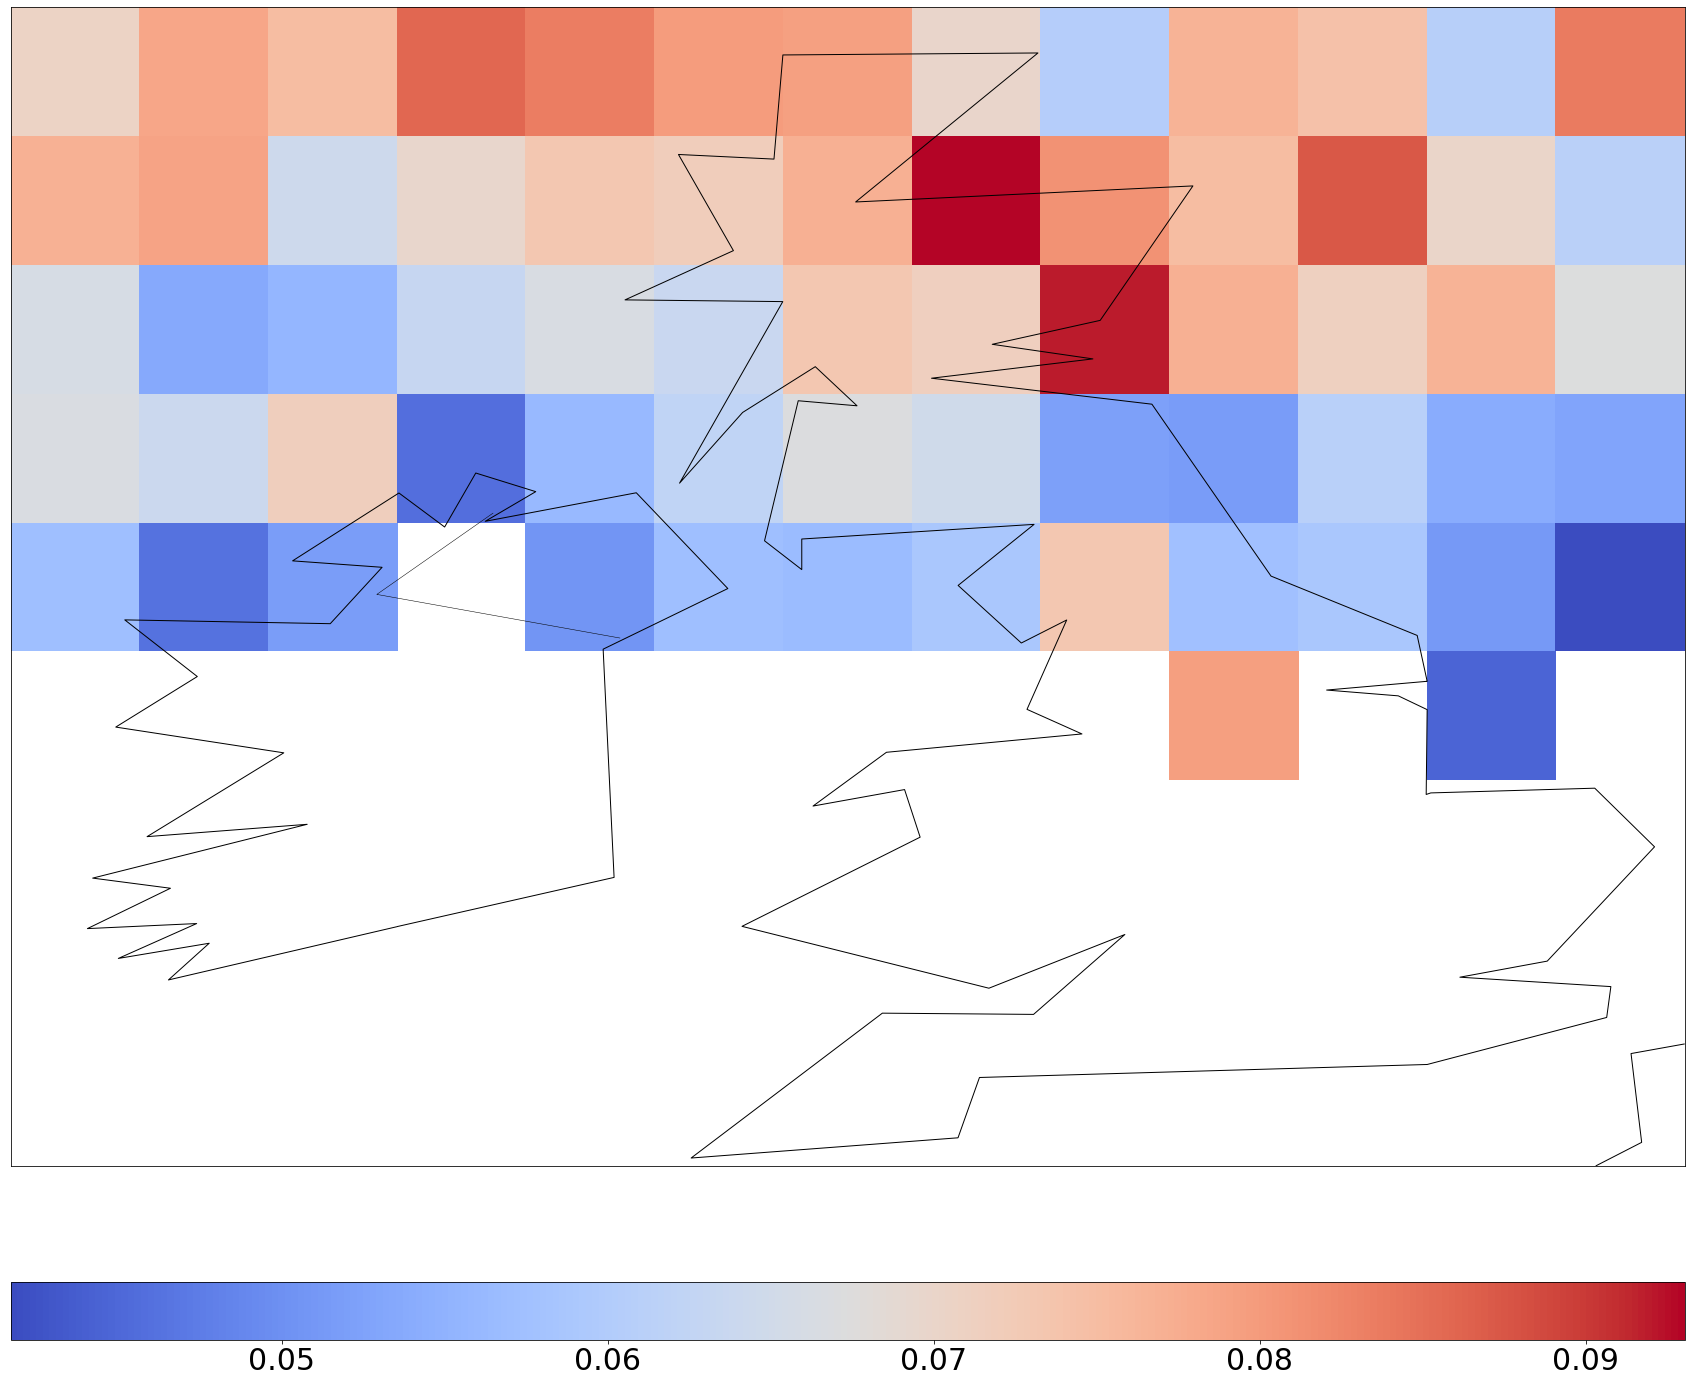

In [21]:
plt.figure(figsize = (30, 150))

m = Basemap(llcrnrlat=lat_0, urcrnrlat=lat_1, llcrnrlon=lon_0, urcrnrlon=lon_1)
xi, yi = m(lon_uk, lat_uk)

my_cmap = plt.get_cmap('coolwarm')

cs = m.pcolor(xi, yi, data[y0:y1,x0:x1], cmap = my_cmap)

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 40.), labels=[1,0,0,0], fontsize=30);
m.drawmeridians(np.arange(-180., 181., 40.), labels=[0,0,0,1], fontsize=30);

m.drawcoastlines()
m.drawcountries()

cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.ax.tick_params(labelsize=30)
#cbar.set_label('count', fontsize=20)

plt.show()

### Time-Series Data

In [22]:
months = np.arange(1, 13, 1)

In [36]:
AOD = []

In [37]:
for x in range(len(List_2018)):
    data = List_2018[x].variables['Aerosol_Optical_Thickness_550_Land_Ocean_Maximum'][:]
    count = sum(sum(data[y0:y1,x0:x1]))
    AOD.append(count)

In [38]:
AOD

[41.28270900249481,
 27.54248321056366,
 26.145154237747192,
 18.72220528125763,
 14.552745282649994,
 masked,
 masked,
 masked,
 masked,
 masked,
 masked,
 27.76145040988922]

In [41]:
data = Jul.variables['Aerosol_Optical_Thickness_550_Land_Ocean_Maximum'][:]

In [45]:
data[y0:y1,x0:x1]

masked_array(
  data=[[--, --, --, --, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, 0.10810967534780502, --,
         0.057424817234277725, --],
        [0.07806210964918137, 0.06625889986753464, 0.06905537098646164,
         --, 0.07422834634780884, 0.07680593430995941,
         0.08428740501403809, 0.089260034263134, 0.09368819743394852,
         0.07075002044439316, 0.06580626964569092, 0.0621088407933712,
         0.07403456419706345],
        [0.15435390174388885, 0.15285125374794006, 0.16990146040916443,
         0.06210874766111374, 0.12099777907133102, 0.15695269405841827,
         0.10738134384155273, 0.11055952310562134, 0.10817690193653107,
         0.07043616473674774, 0.08891436457633972, 0.0774707943201065,
         0.09727679938077927],
        [0.17302604019641876, 0.14171656966209412, 0.17760950326919556,
     

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:591: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)


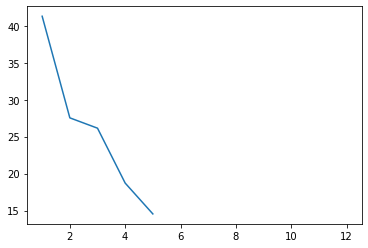

In [25]:
plt.plot(months, AOD)

In [165]:
data_test = Jan.variables['Aerosol_Optical_Thickness_550_Land_Ocean_Mean'][:]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  app.launch_new_instance()


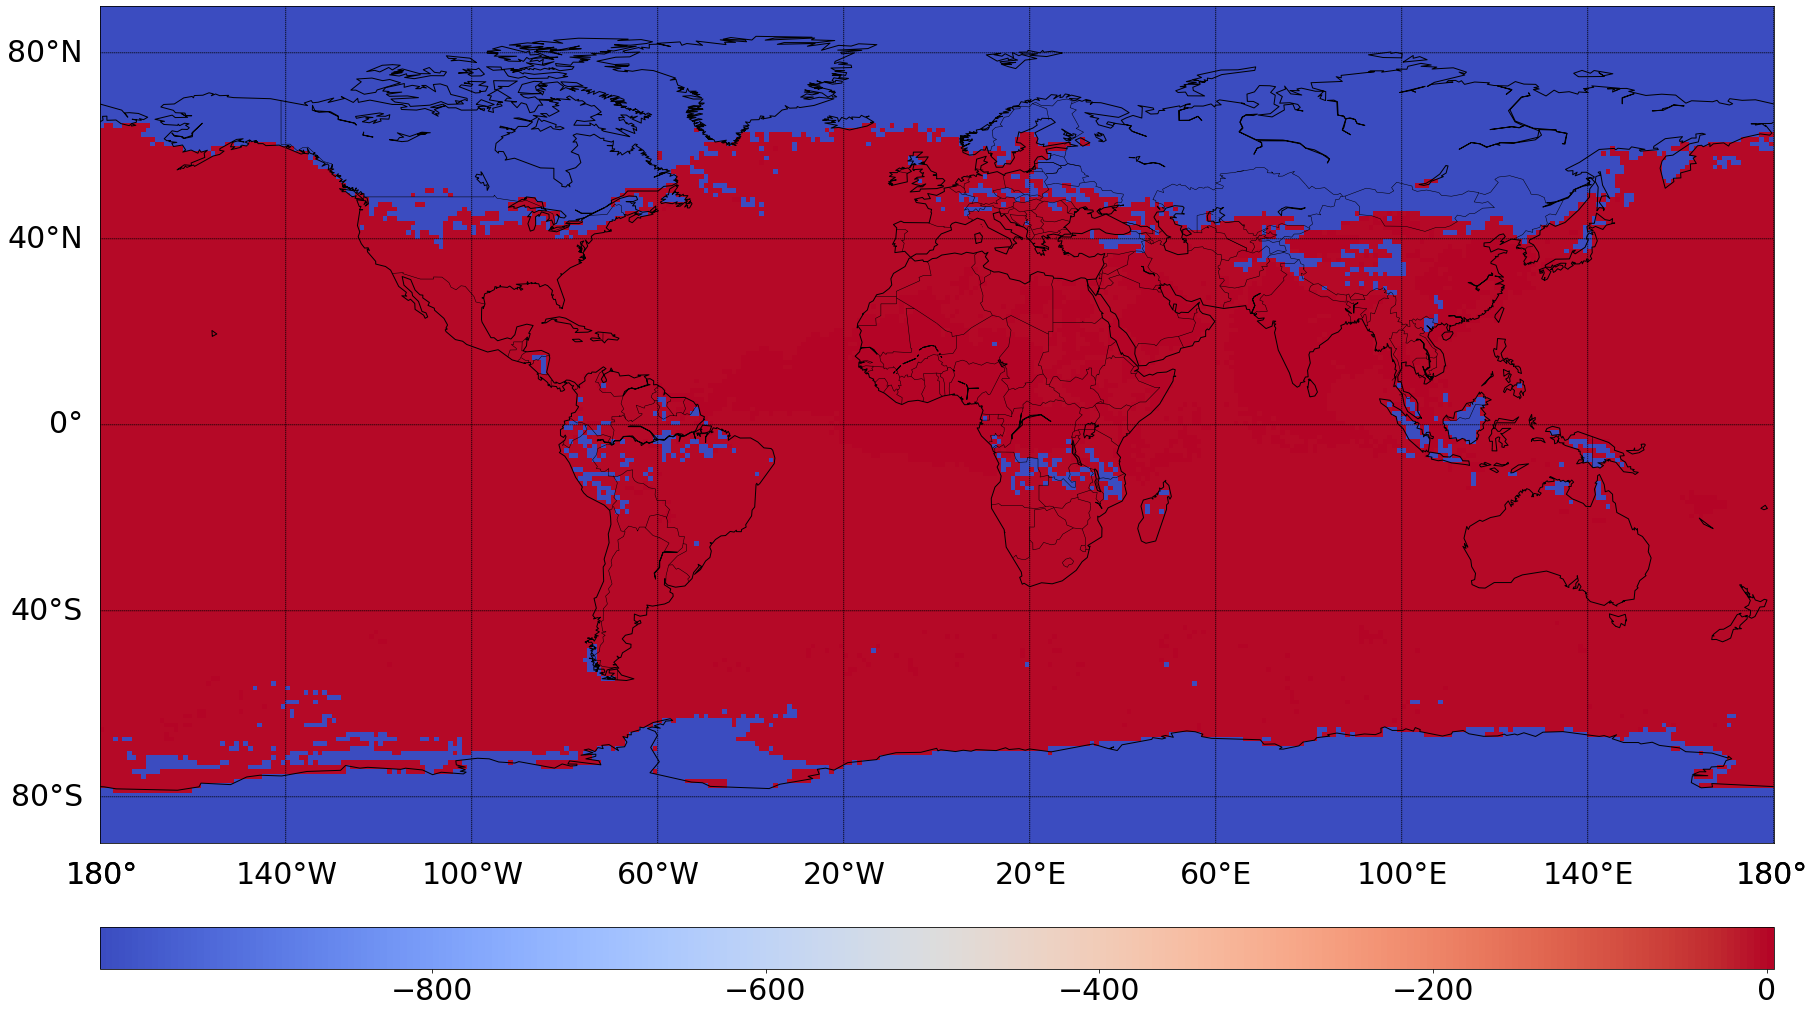

In [177]:
plt.figure(figsize = (30, 150))

#m = Basemap(llcrnrlat=lat_0, urcrnrlat=lat_1, llcrnrlon=lon_0, urcrnrlon=lon_1)
m = Basemap()
xi, yi = m(np.arange(-180, 181, 1), np.arange(-90, 91, 1))

my_cmap = plt.get_cmap('coolwarm')

cs = m.pcolormesh(xi,yi, data.data, cmap = my_cmap)

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 40.), labels=[1,0,0,0], fontsize=30);
m.drawmeridians(np.arange(-180., 181., 40.), labels=[0,0,0,1], fontsize=30);

m.drawcoastlines()
m.drawcountries()

cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.ax.tick_params(labelsize=30)
#cbar.set_label('count', fontsize=20)

plt.show()